In [36]:
options(jupyter.plot_mimetypes = 'image/png')
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)

In [72]:
library(clusterProfiler)
library(ReactomePA)
library(readr)
library(org.Hs.eg.db)
library(enrichplot)

In [65]:
SUM159_C1 = read_csv("../sc/SUM159R_subsets Features R1_up_all.csv")

SUM159_C1 = SUM159_C1[SUM159_C1$`SUM159R1 P-Value` < 0.05,]

dim(SUM159_C1)
head(SUM159_C1)

write.table(SUM159_C1, "../sc/SUM159R_subsets Features R1_up_all_sigonly.tsv", row.names=FALSE, sep="\t", quote=F)


Rows: 1037 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): FeatureID, FeatureName
dbl (6): SUM159R1 Average, SUM159R1 Log2 Fold Change, SUM159R1 P-Value, SUM1...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 51  8

FeatureID,FeatureName,SUM159R1 Average,SUM159R1 Log2 Fold Change,SUM159R1 P-Value,SUM159R2 Average,SUM159R2 Log2 Fold Change,SUM159R2 P-Value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000253377,AC068672.2,1.349143,3.530196,2.474319e-22,0.1155326,-3.530196,2.474319e-22
ENSG00000137691,CFAP300,1.402430,2.150597,3.390261e-11,0.3147266,-2.150597,3.390261e-11
ENSG00000137500,CCDC90B,3.887566,1.912991,2.968033e-10,1.0304973,-1.912991,2.968033e-10
ENSG00000152558,TMEM123,11.040203,1.852590,7.458904e-10,3.0529810,-1.852590,7.458904e-10
ENSG00000246067,RAB30-DT,4.275112,1.880286,1.043971e-09,1.1593095,-1.880286,1.043971e-09
ENSG00000225383,SFTA1P,1.005196,2.098340,1.311061e-09,0.2337210,-2.098340,1.311061e-09


In [43]:
geneList_C1 = SUM159_C1$`SUM159R1 Log2 Fold Change`
names(geneList_C1) = SUM159_C1$FeatureName
names(geneList_C1) = mapIds(org.Hs.eg.db, names(geneList_C1), 'ENTREZID', 'SYMBOL')

geneList_C1 = geneList_C1[!is.na(names(geneList_C1))]
geneList_C1 = geneList_C1[order(geneList_C1, decreasing = TRUE)]

'select()' returned 1:1 mapping between keys and columns



In [66]:
SUM159_C2 = read_csv("../sc/SUM159R_subsets Features R2_up.csv")

SUM159_C2 = SUM159_C2[SUM159_C2$`SUM159R1 P-Value` < 0.05,]

dim(SUM159_C2)
head(SUM159_C2)

write.table(SUM159_C2, "../sc/SUM159R_subsets Features R2_up_all_sigonly.tsv", row.names=FALSE, sep="\t", quote=F)


Rows: 100 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): FeatureID, FeatureName
dbl (6): SUM159R1 Average, SUM159R1 Log2 Fold Change, SUM159R1 P-Value, SUM1...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



[1] 37  8

FeatureID,FeatureName,SUM159R1 Average,SUM159R1 Log2 Fold Change,SUM159R1 P-Value,SUM159R2 Average,SUM159R2 Log2 Fold Change,SUM159R2 P-Value
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000120738,EGR1,0.4626325,-1.855593,2.470063e-06,1.679870,1.855593,2.470063e-06
ENSG00000130303,BST2,0.5110757,-1.758617,3.516028e-06,1.734316,1.758617,3.516028e-06
ENSG00000134352,IL6ST,0.7339143,-1.587006,2.532318e-05,2.208398,1.587006,2.532318e-05
ENSG00000123219,CENPK,0.5256086,-1.465657,1.715864e-04,1.455445,1.465657,1.715864e-04
ENSG00000139318,DUSP6,0.5110757,-1.375240,6.677093e-04,1.329288,1.375240,6.677093e-04
ENSG00000145741,BTF3,16.9357397,-1.246778,7.618007e-04,40.150884,1.246778,7.618007e-04


In [45]:
geneList_C2 = SUM159_C2$`SUM159R2 Log2 Fold Change`
names(geneList_C2) = SUM159_C2$FeatureName
names(geneList_C2) = mapIds(org.Hs.eg.db, names(geneList_C2), 'ENTREZID', 'SYMBOL')

geneList_C2 = geneList_C2[!is.na(names(geneList_C2))]
geneList_C2 = geneList_C2[order(geneList_C2, decreasing = TRUE)]

'select()' returned 1:1 mapping between keys and columns



In [53]:
egoC1 <- enrichGO(gene          = names(geneList_C1),
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                minGSSize    = 15,
                maxGSSize    = 150,
                pvalueCutoff  = 0.2,
                qvalueCutoff  = 0.2,
        readable      = TRUE)
head(egoC1)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0009595,GO:0009595,detection of biotic stimulus,3/42,36/18866,6.959886e-05,0.02478607,0.02045924,YAP1/PAK1/HLA-B,3
GO:0033108,GO:0033108,mitochondrial respiratory chain complex assembly,4/42,102/18866,7.697537e-05,0.02478607,0.02045924,NDUFC2/TMEM126A/TMEM126B/COA4,4
GO:0010257,GO:0010257,NADH dehydrogenase complex assembly,3/42,65/18866,4.070980e-04,0.06554278,0.05410118,NDUFC2/TMEM126A/TMEM126B,3
GO:0032981,GO:0032981,mitochondrial respiratory chain complex I assembly,3/42,65/18866,4.070980e-04,0.06554278,0.05410118,NDUFC2/TMEM126A/TMEM126B,3
GO:1902992,GO:1902992,negative regulation of amyloid precursor protein catabolic process,2/42,17/18866,6.442120e-04,0.08245031,0.06805722,PICALM/CLU,2
GO:0060602,GO:0060602,branch elongation of an epithelium,2/42,19/18866,8.077183e-04,0.08245031,0.06805722,AREG/YAP1,2


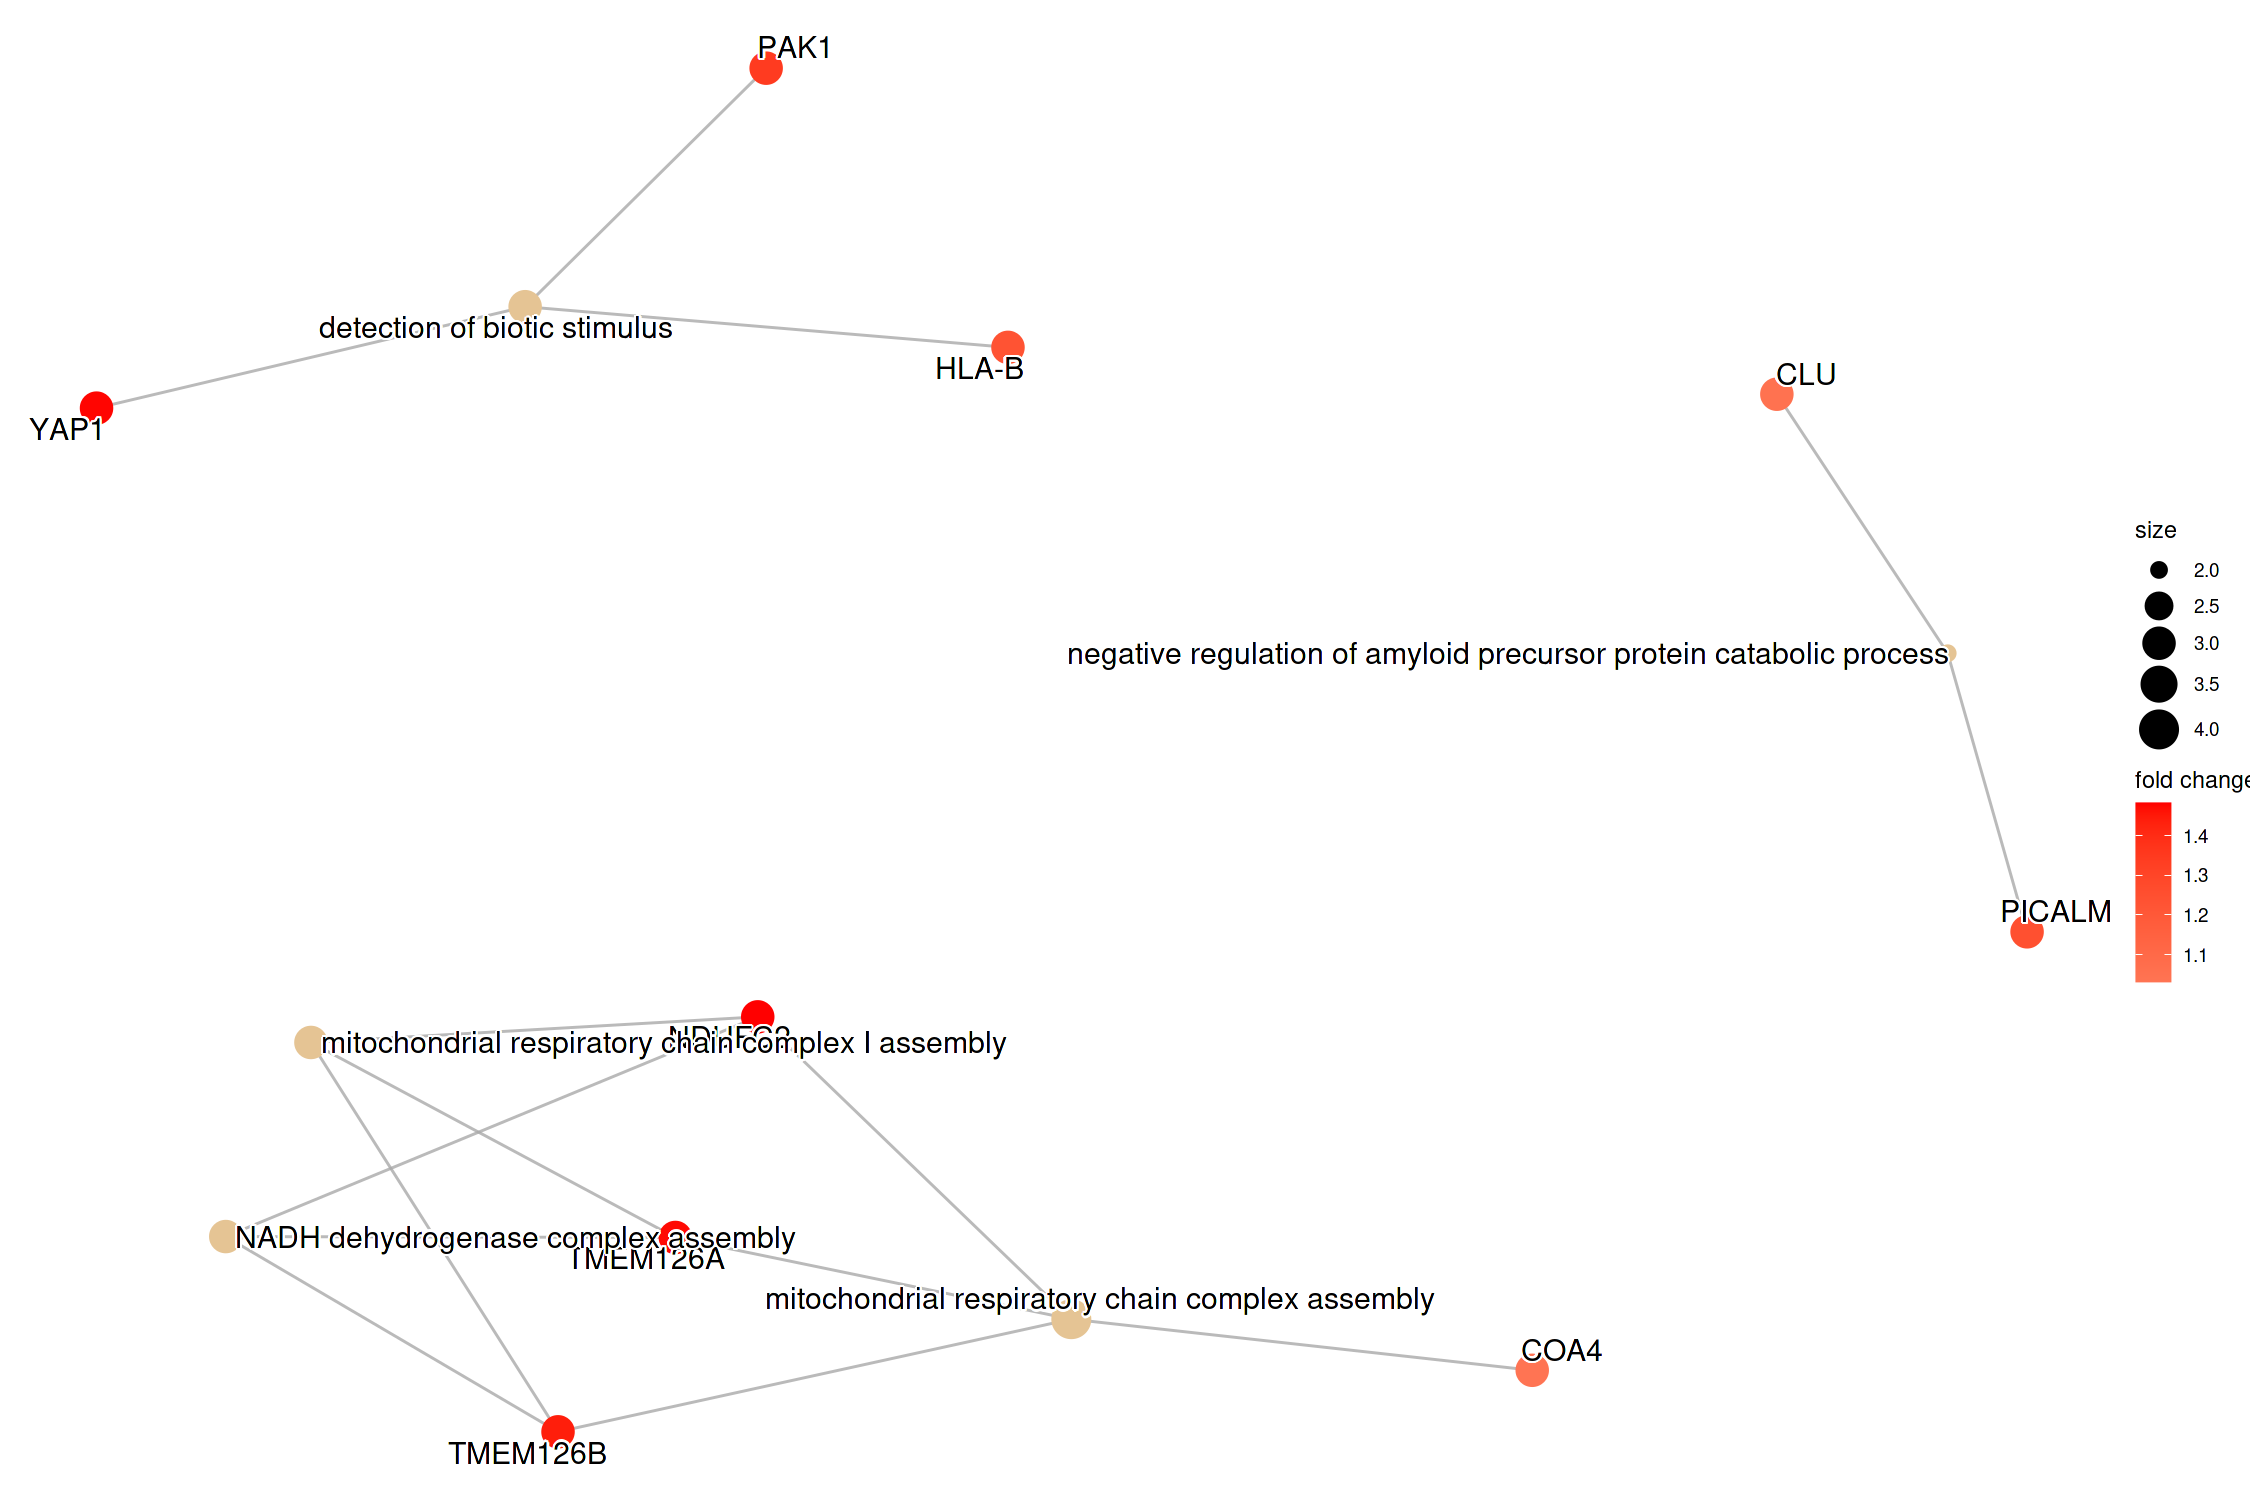

In [70]:
cnetplot(egoC1, foldChange=geneList_C1)

In [52]:
egoC2 <- enrichGO(gene          = names(geneList_C2),
                OrgDb         = org.Hs.eg.db,
                ont           = "BP",
                pAdjustMethod = "BH",
                minGSSize    = 15,
                maxGSSize    = 150,
                pvalueCutoff  = 0.2,
                qvalueCutoff  = 0.2,
        readable      = TRUE)
head(egoC2)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0051382,GO:0051382,kinetochore assembly,2/34,17/18866,0.0004215306,0.08759837,0.06970624,CENPK/CENPH,2
GO:0002718,GO:0002718,regulation of cytokine production involved in immune response,3/34,83/18866,0.0004452633,0.08759837,0.06970624,BST2/IL18/HMOX1,3
GO:0006112,GO:0006112,energy reserve metabolic process,3/34,86/18866,0.0004941231,0.08759837,0.06970624,IL6ST/ADGRF5/PHLDA2,3
GO:0051383,GO:0051383,kinetochore organization,2/34,22/18866,0.0007119497,0.08759837,0.06970624,CENPK/CENPH,2
GO:0002719,GO:0002719,negative regulation of cytokine production involved in immune response,2/34,24/18866,0.0008487223,0.08759837,0.06970624,BST2/HMOX1,2
GO:0001824,GO:0001824,blastocyst development,3/34,104/18866,0.0008600120,0.08759837,0.06970624,JUNB/ZPR1/TM4SF1,3


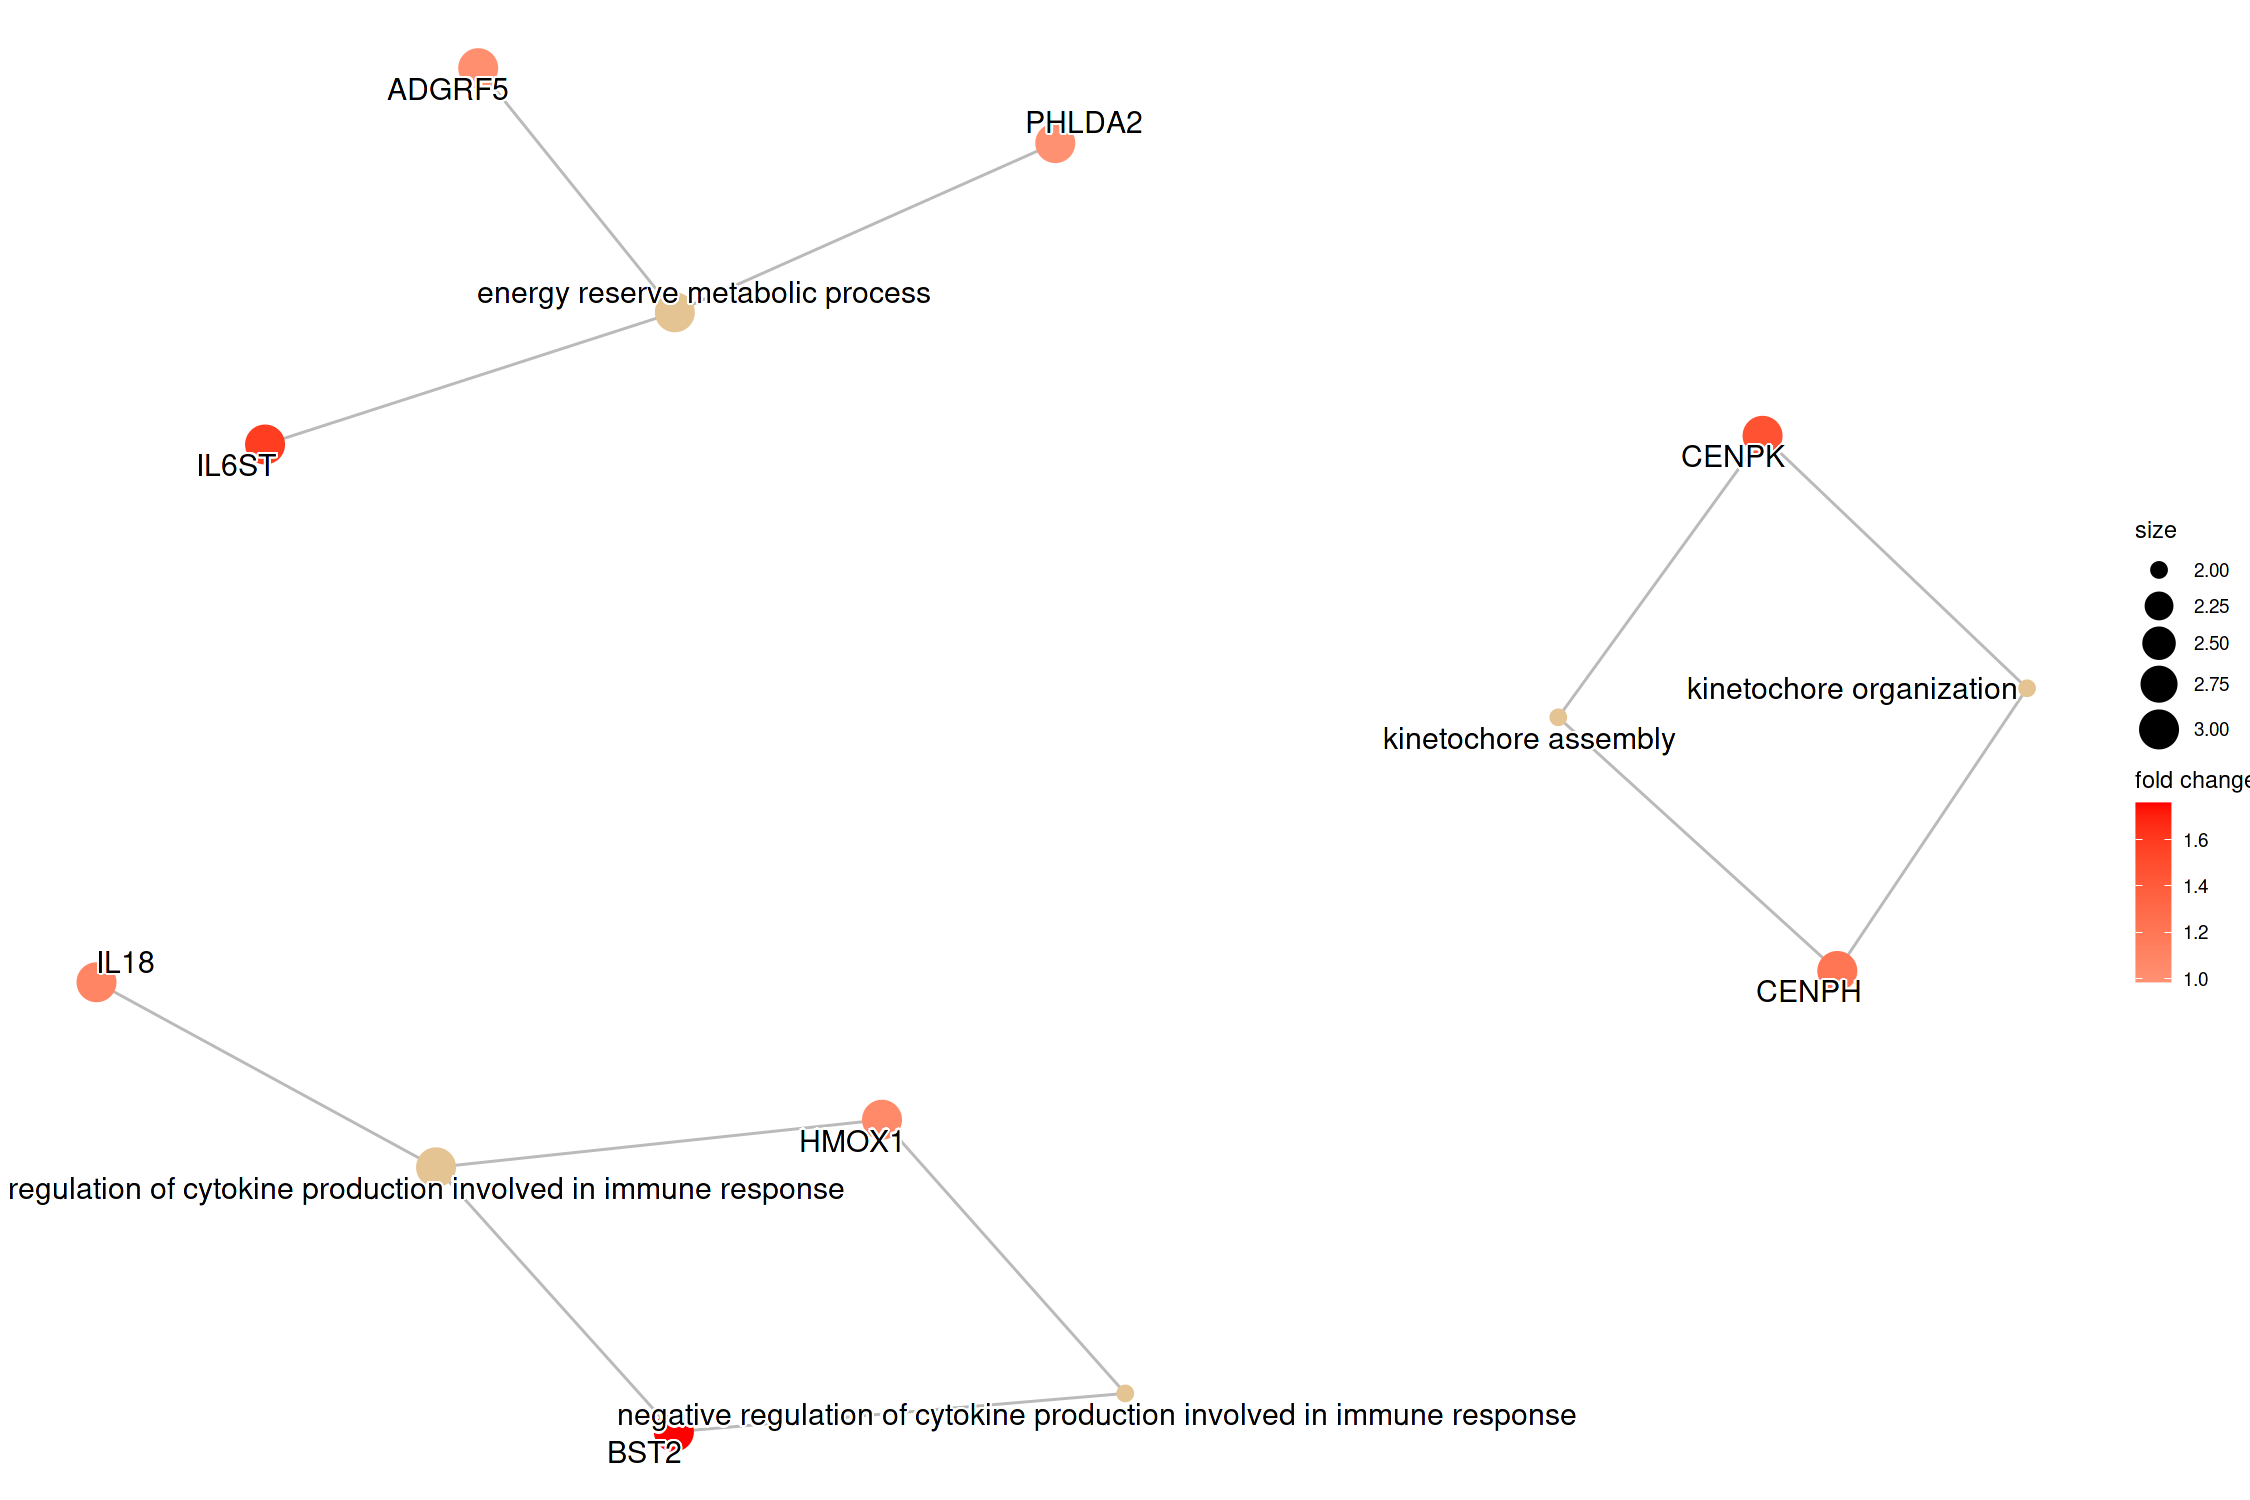

In [69]:
cnetplot(egoC2, foldChange=geneList_C2)

Warning message:
“Ignoring unknown parameters: align”


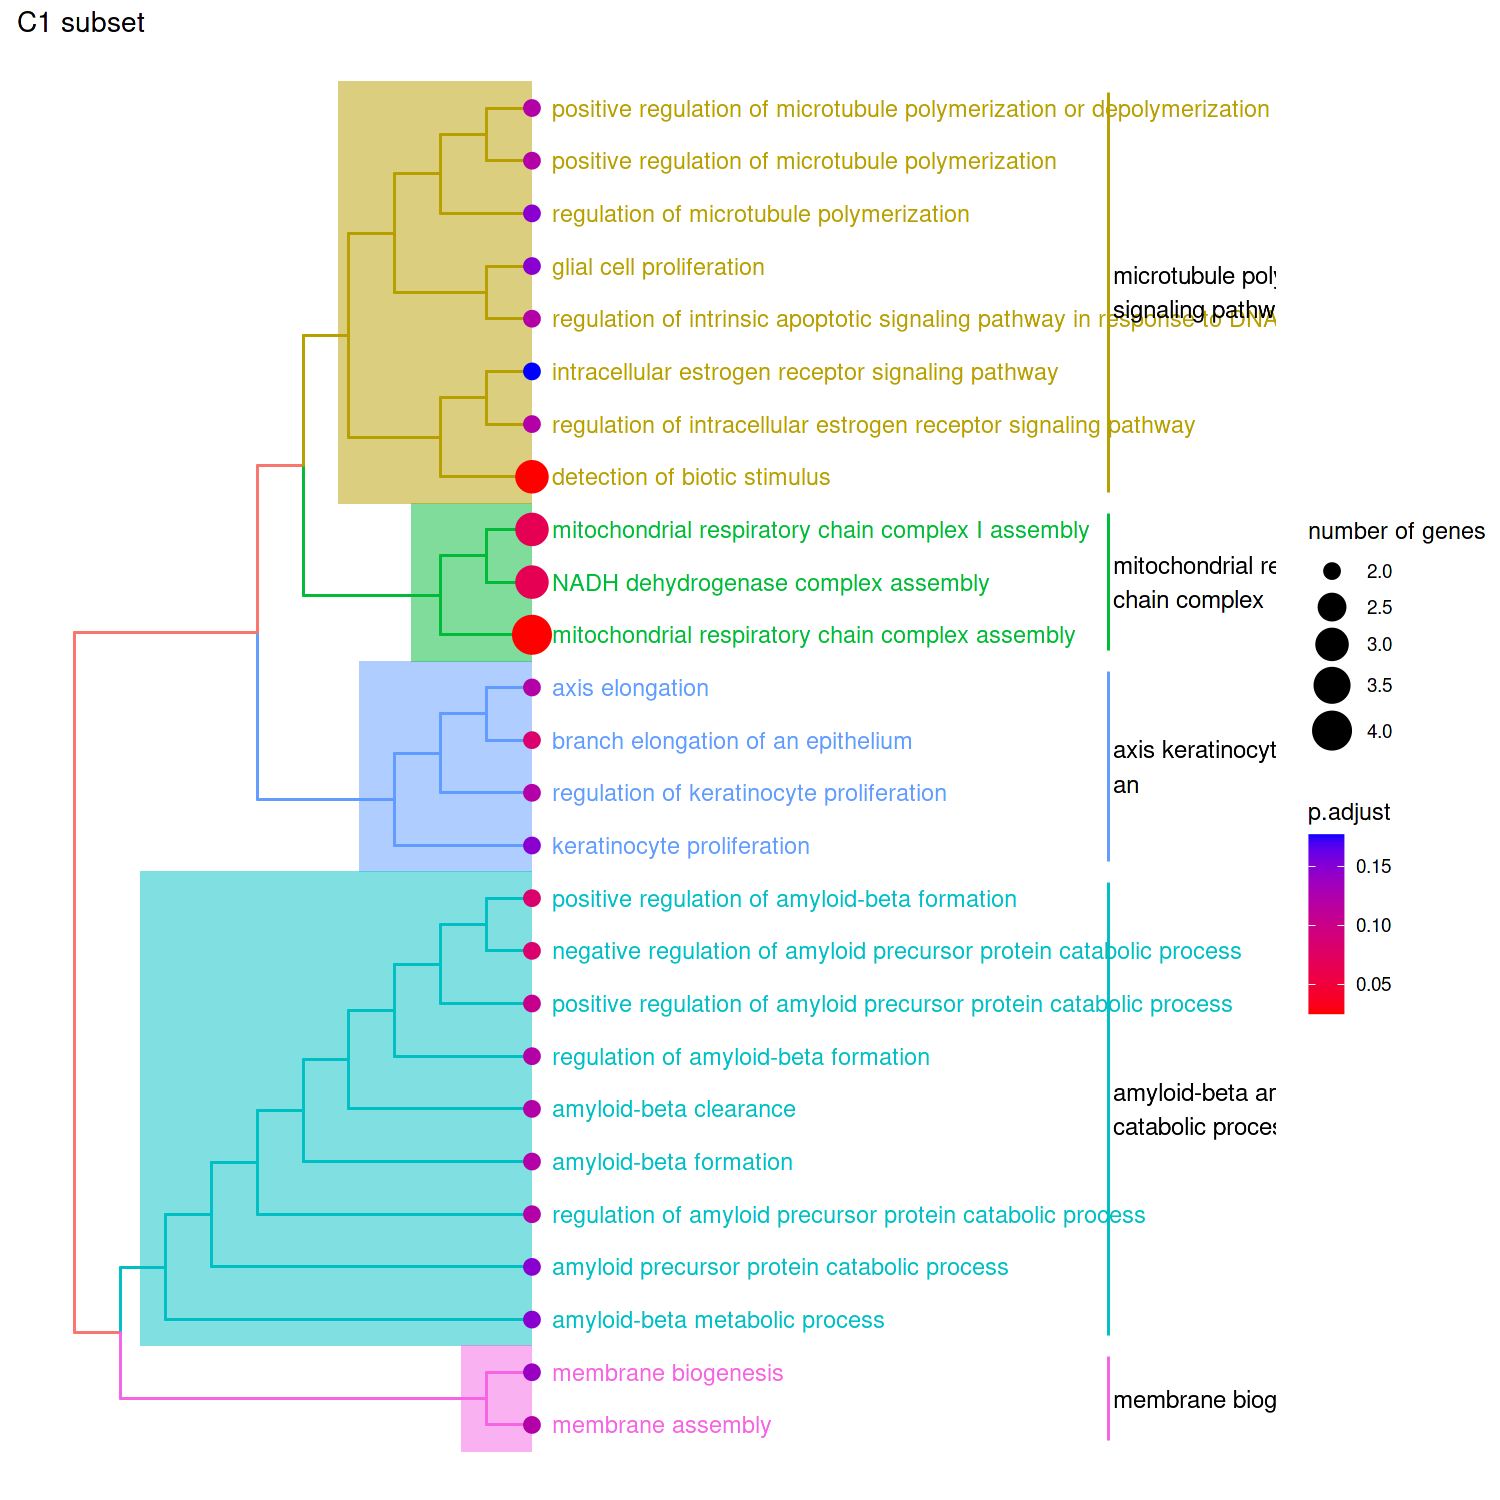

In [80]:
egoC1t <- pairwise_termsim(egoC1)
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)
treeplot(egoC1t)+ggtitle("C1 subset")
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)

Warning message:
“Ignoring unknown parameters: align”


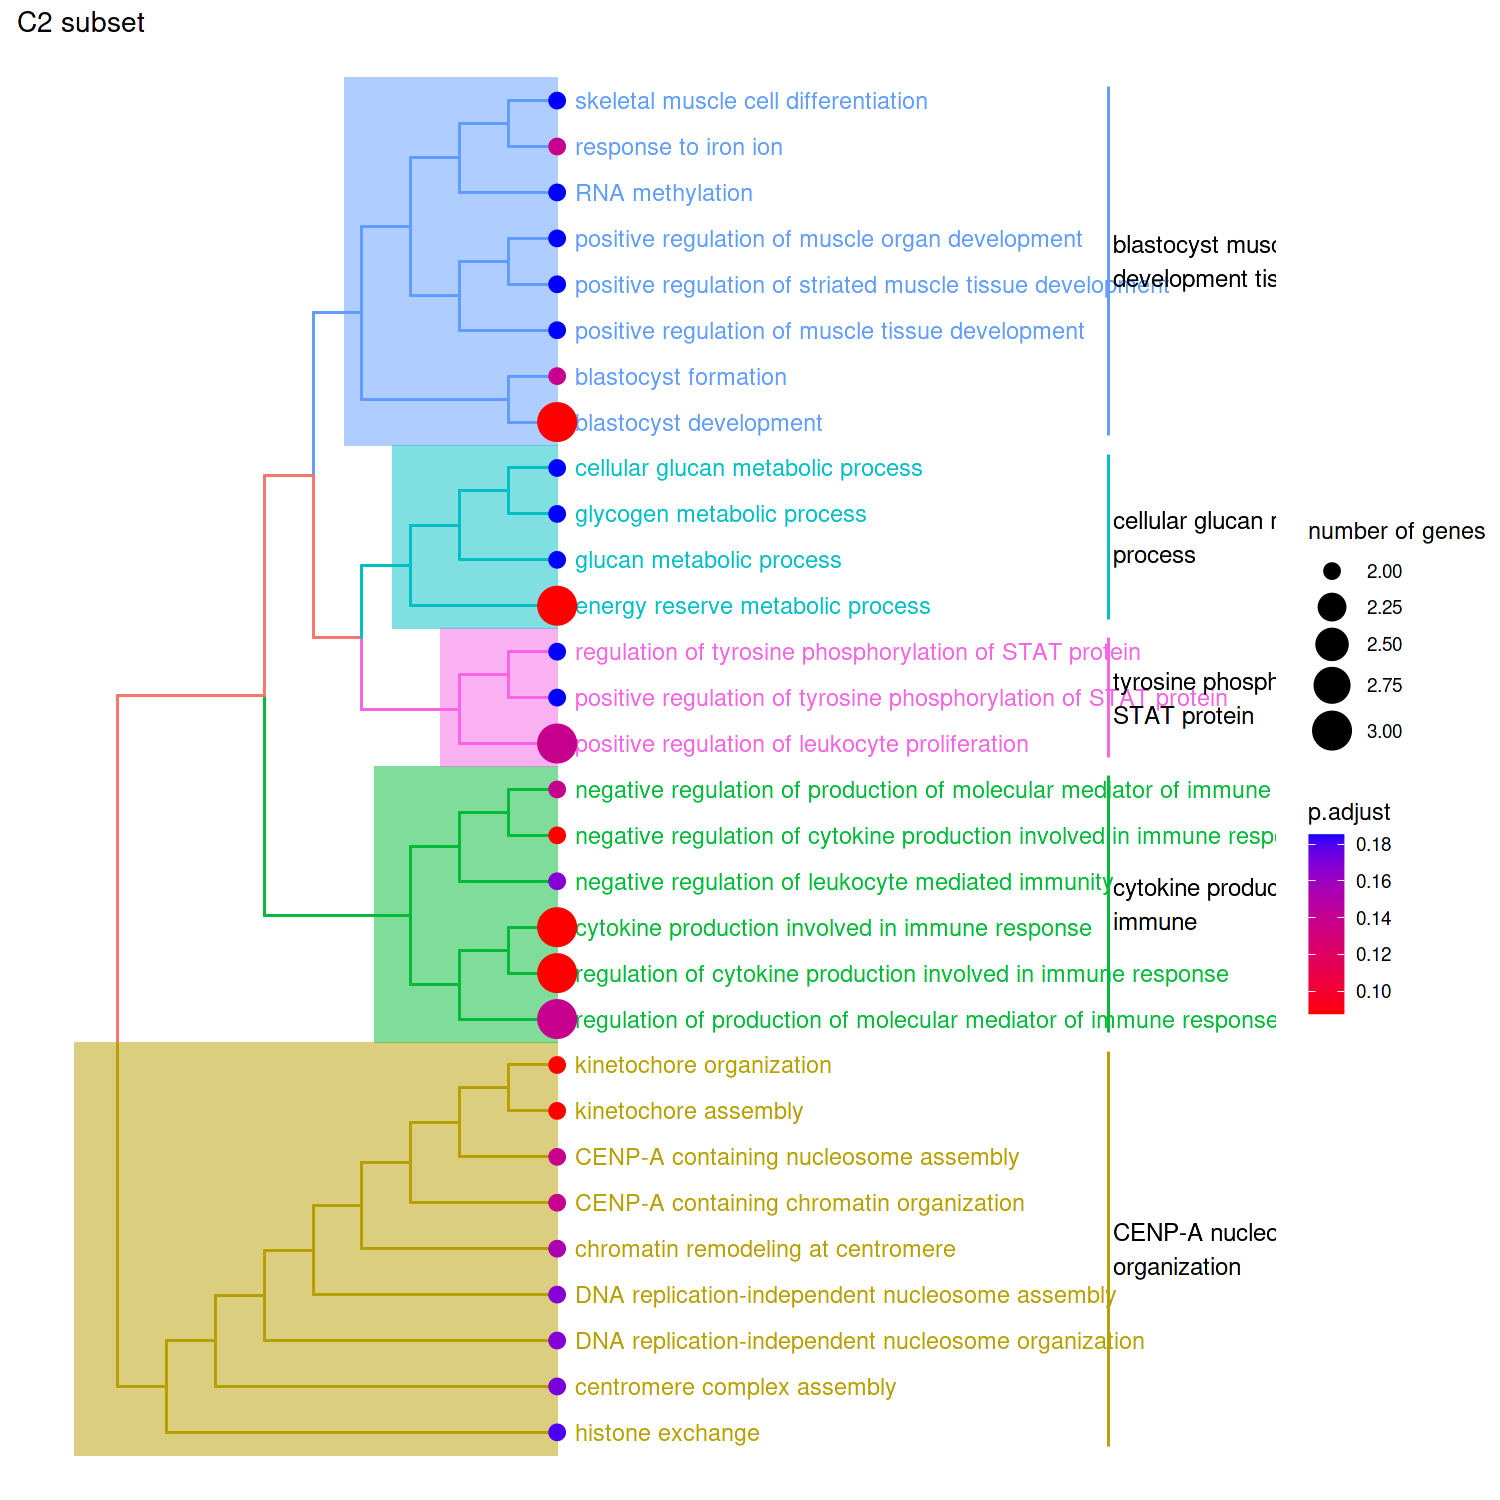

In [79]:
egoC2t <- pairwise_termsim(egoC2)
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 150)
treeplot(egoC2t)+ggtitle("C2 subset")
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)

In [57]:
eraC1 <- enrichPathway(gene= names(geneList_C1),
                pAdjustMethod = "BH",
                minGSSize    = 5,
                maxGSSize    = 50,
                pvalueCutoff  = 0.2,
                qvalueCutoff  = 0.2,
        readable      = TRUE)
head(eraC1)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-HSA-168638,R-HSA-168638,NOD1/2 Signaling Pathway,2/30,37/10704,0.00475854,0.1138957,0.08584733,CASP4/BIRC2,2
R-HSA-70370,R-HSA-70370,Galactose catabolism,1/30,5/10704,0.01393771,0.1138957,0.08584733,PGM2L1,1
R-HSA-166665,R-HSA-166665,Terminal pathway of complement,1/30,8/10704,0.02221000,0.1138957,0.08584733,CLU,1
R-HSA-5638302,R-HSA-5638302,Signaling by Overexpressed Wild-Type EGFR in Cancer,1/30,8/10704,0.02221000,0.1138957,0.08584733,AREG,1
R-HSA-5638303,R-HSA-5638303,Inhibition of Signaling by Overexpressed EGFR,1/30,8/10704,0.02221000,0.1138957,0.08584733,AREG,1
R-HSA-8951671,R-HSA-8951671,RUNX3 regulates YAP1-mediated transcription,1/30,8/10704,0.02221000,0.1138957,0.08584733,YAP1,1


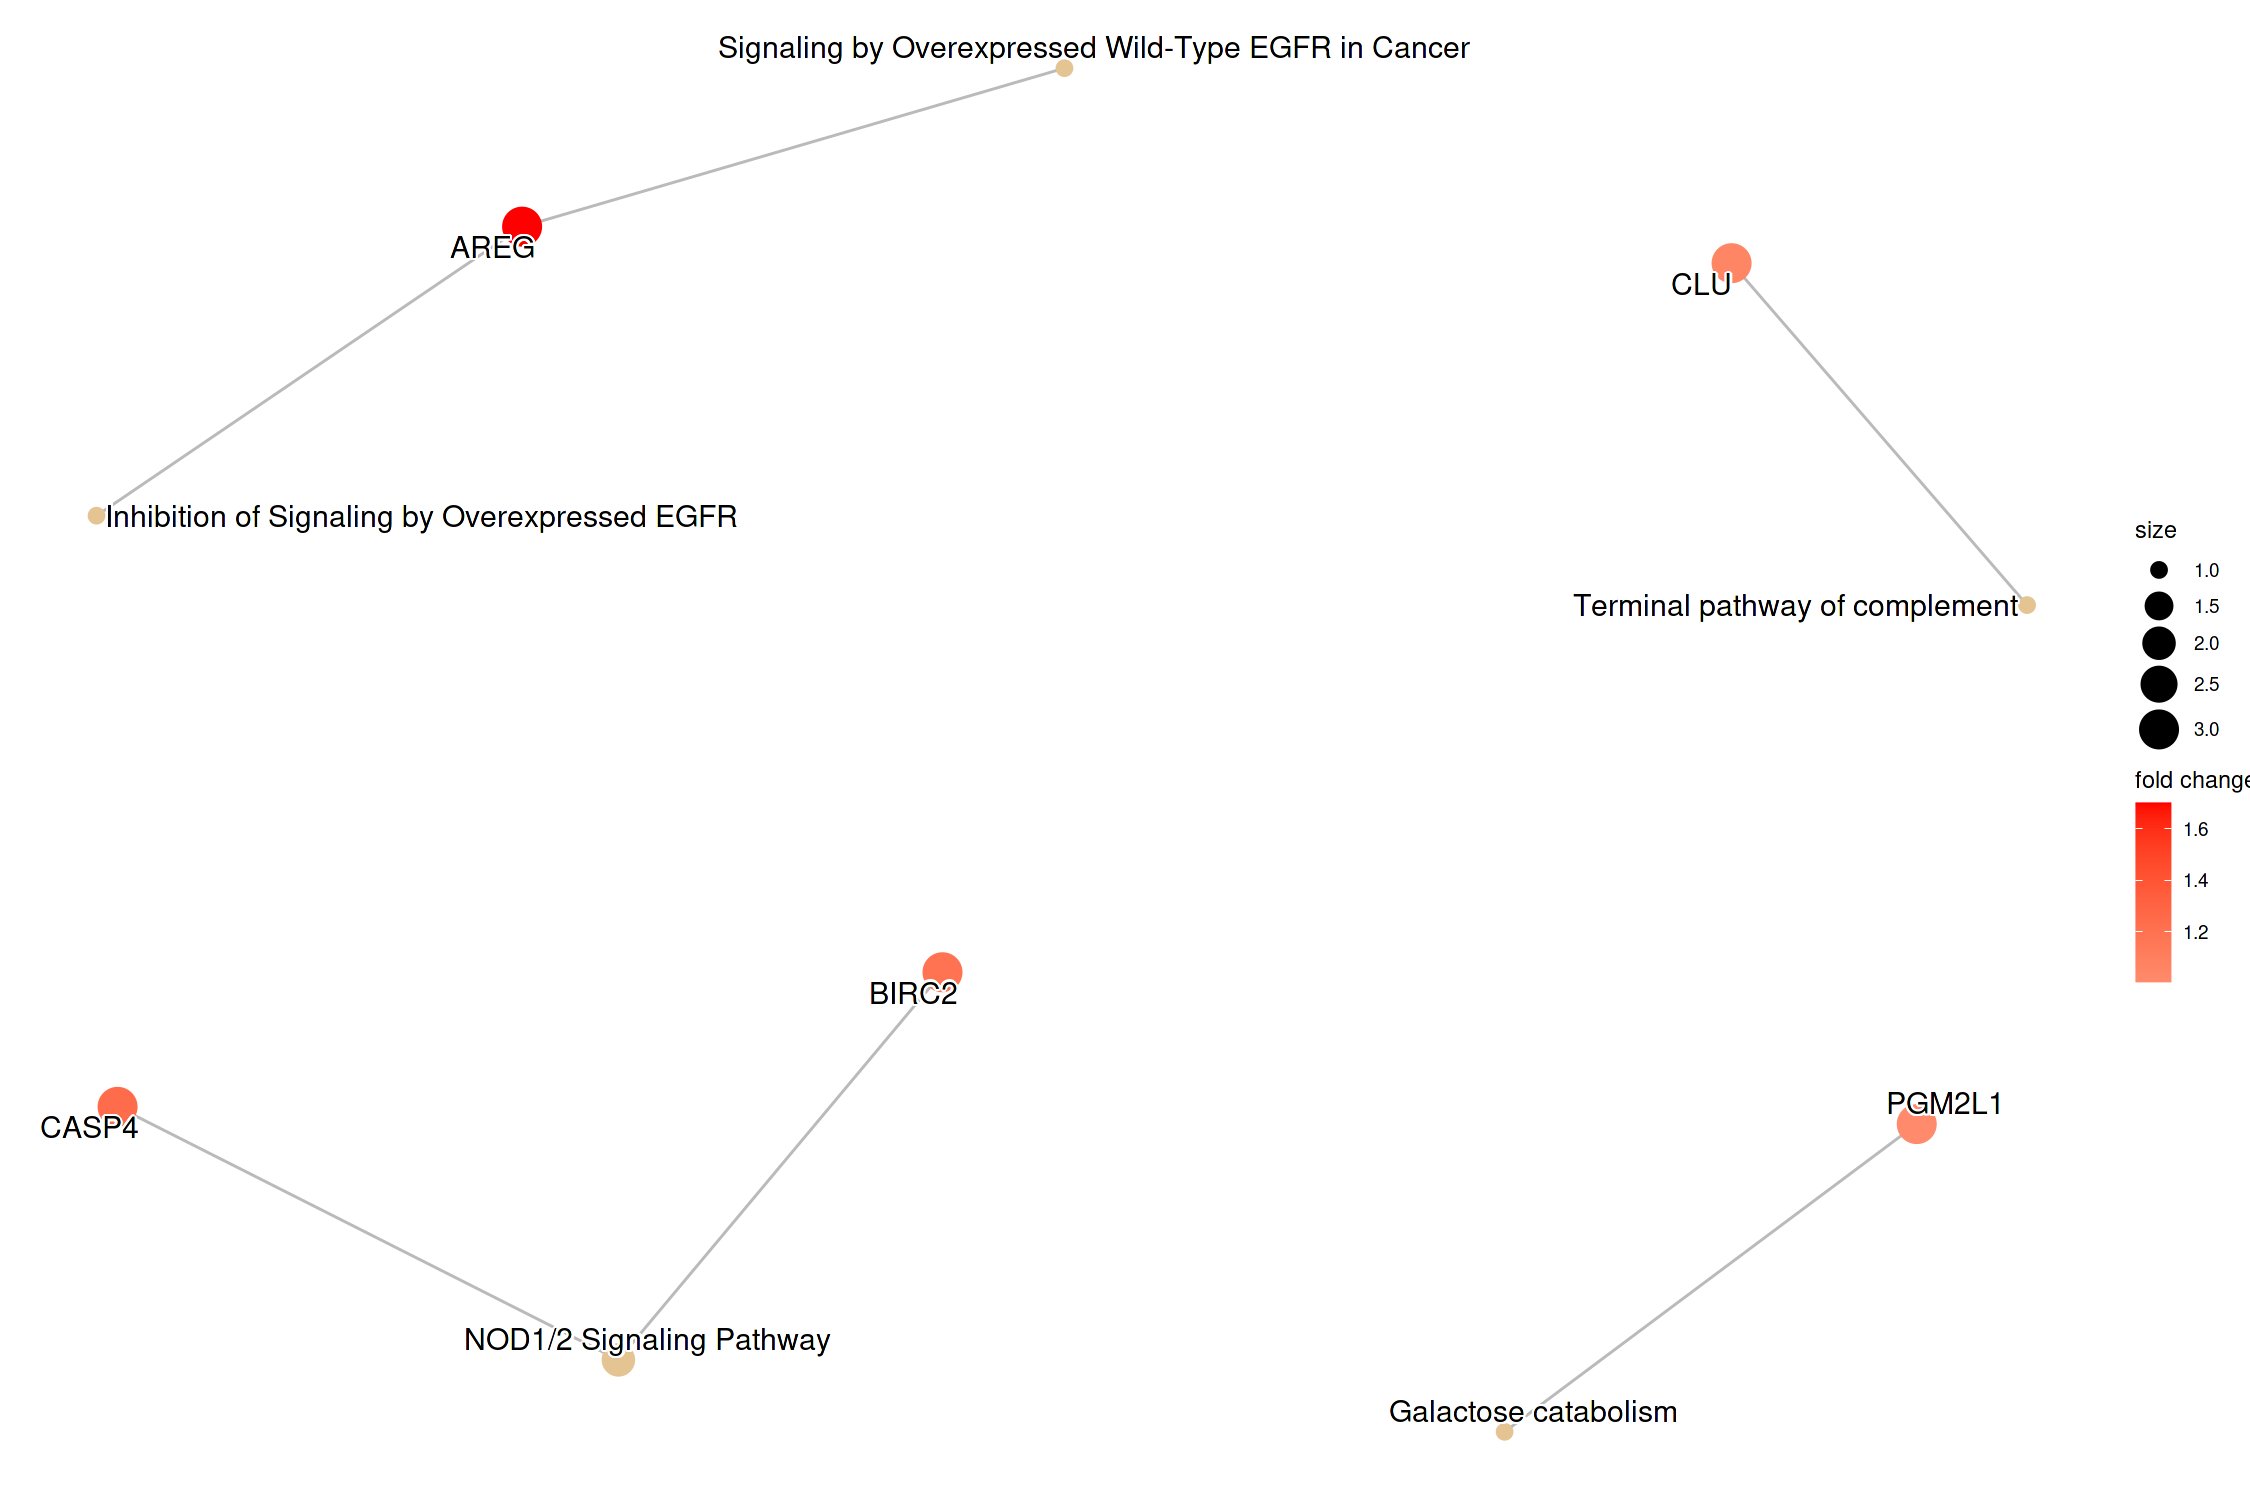

In [58]:
cnetplot(eraC1, foldChange=geneList_C1)

In [59]:
eraC2 <- enrichPathway(gene= names(geneList_C2),
                pAdjustMethod = "BH",
                minGSSize    = 5,
                maxGSSize    = 150,
                pvalueCutoff  = 0.2,
                qvalueCutoff  = 0.2,
        readable      = TRUE)
head(eraC2)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
R-HSA-198725,R-HSA-198725,Nuclear Events (kinase and transcription factor activation),3/25,61/10704,0.0003704313,0.05815771,0.04211219,EGR1/DUSP6/JUNB,3
R-HSA-112409,R-HSA-112409,RAF-independent MAPK1/3 activation,2/25,23/10704,0.0012857549,0.08255170,0.05977595,IL6ST/DUSP6,2
R-HSA-6785807,R-HSA-6785807,Interleukin-4 and Interleukin-13 signaling,3/25,108/10704,0.0019546503,0.08255170,0.05977595,JUNB/IL18/HMOX1,3
R-HSA-187037,R-HSA-187037,Signaling by NTRK1 (TRKA),3/25,115/10704,0.0023386311,0.08255170,0.05977595,EGR1/DUSP6/JUNB,3
R-HSA-2500257,R-HSA-2500257,Resolution of Sister Chromatid Cohesion,3/25,126/10704,0.0030313676,0.08255170,0.05977595,CENPK/CCNB1/CENPH,3
R-HSA-166520,R-HSA-166520,Signaling by NTRKs,3/25,134/10704,0.0036068436,0.08255170,0.05977595,EGR1/DUSP6/JUNB,3


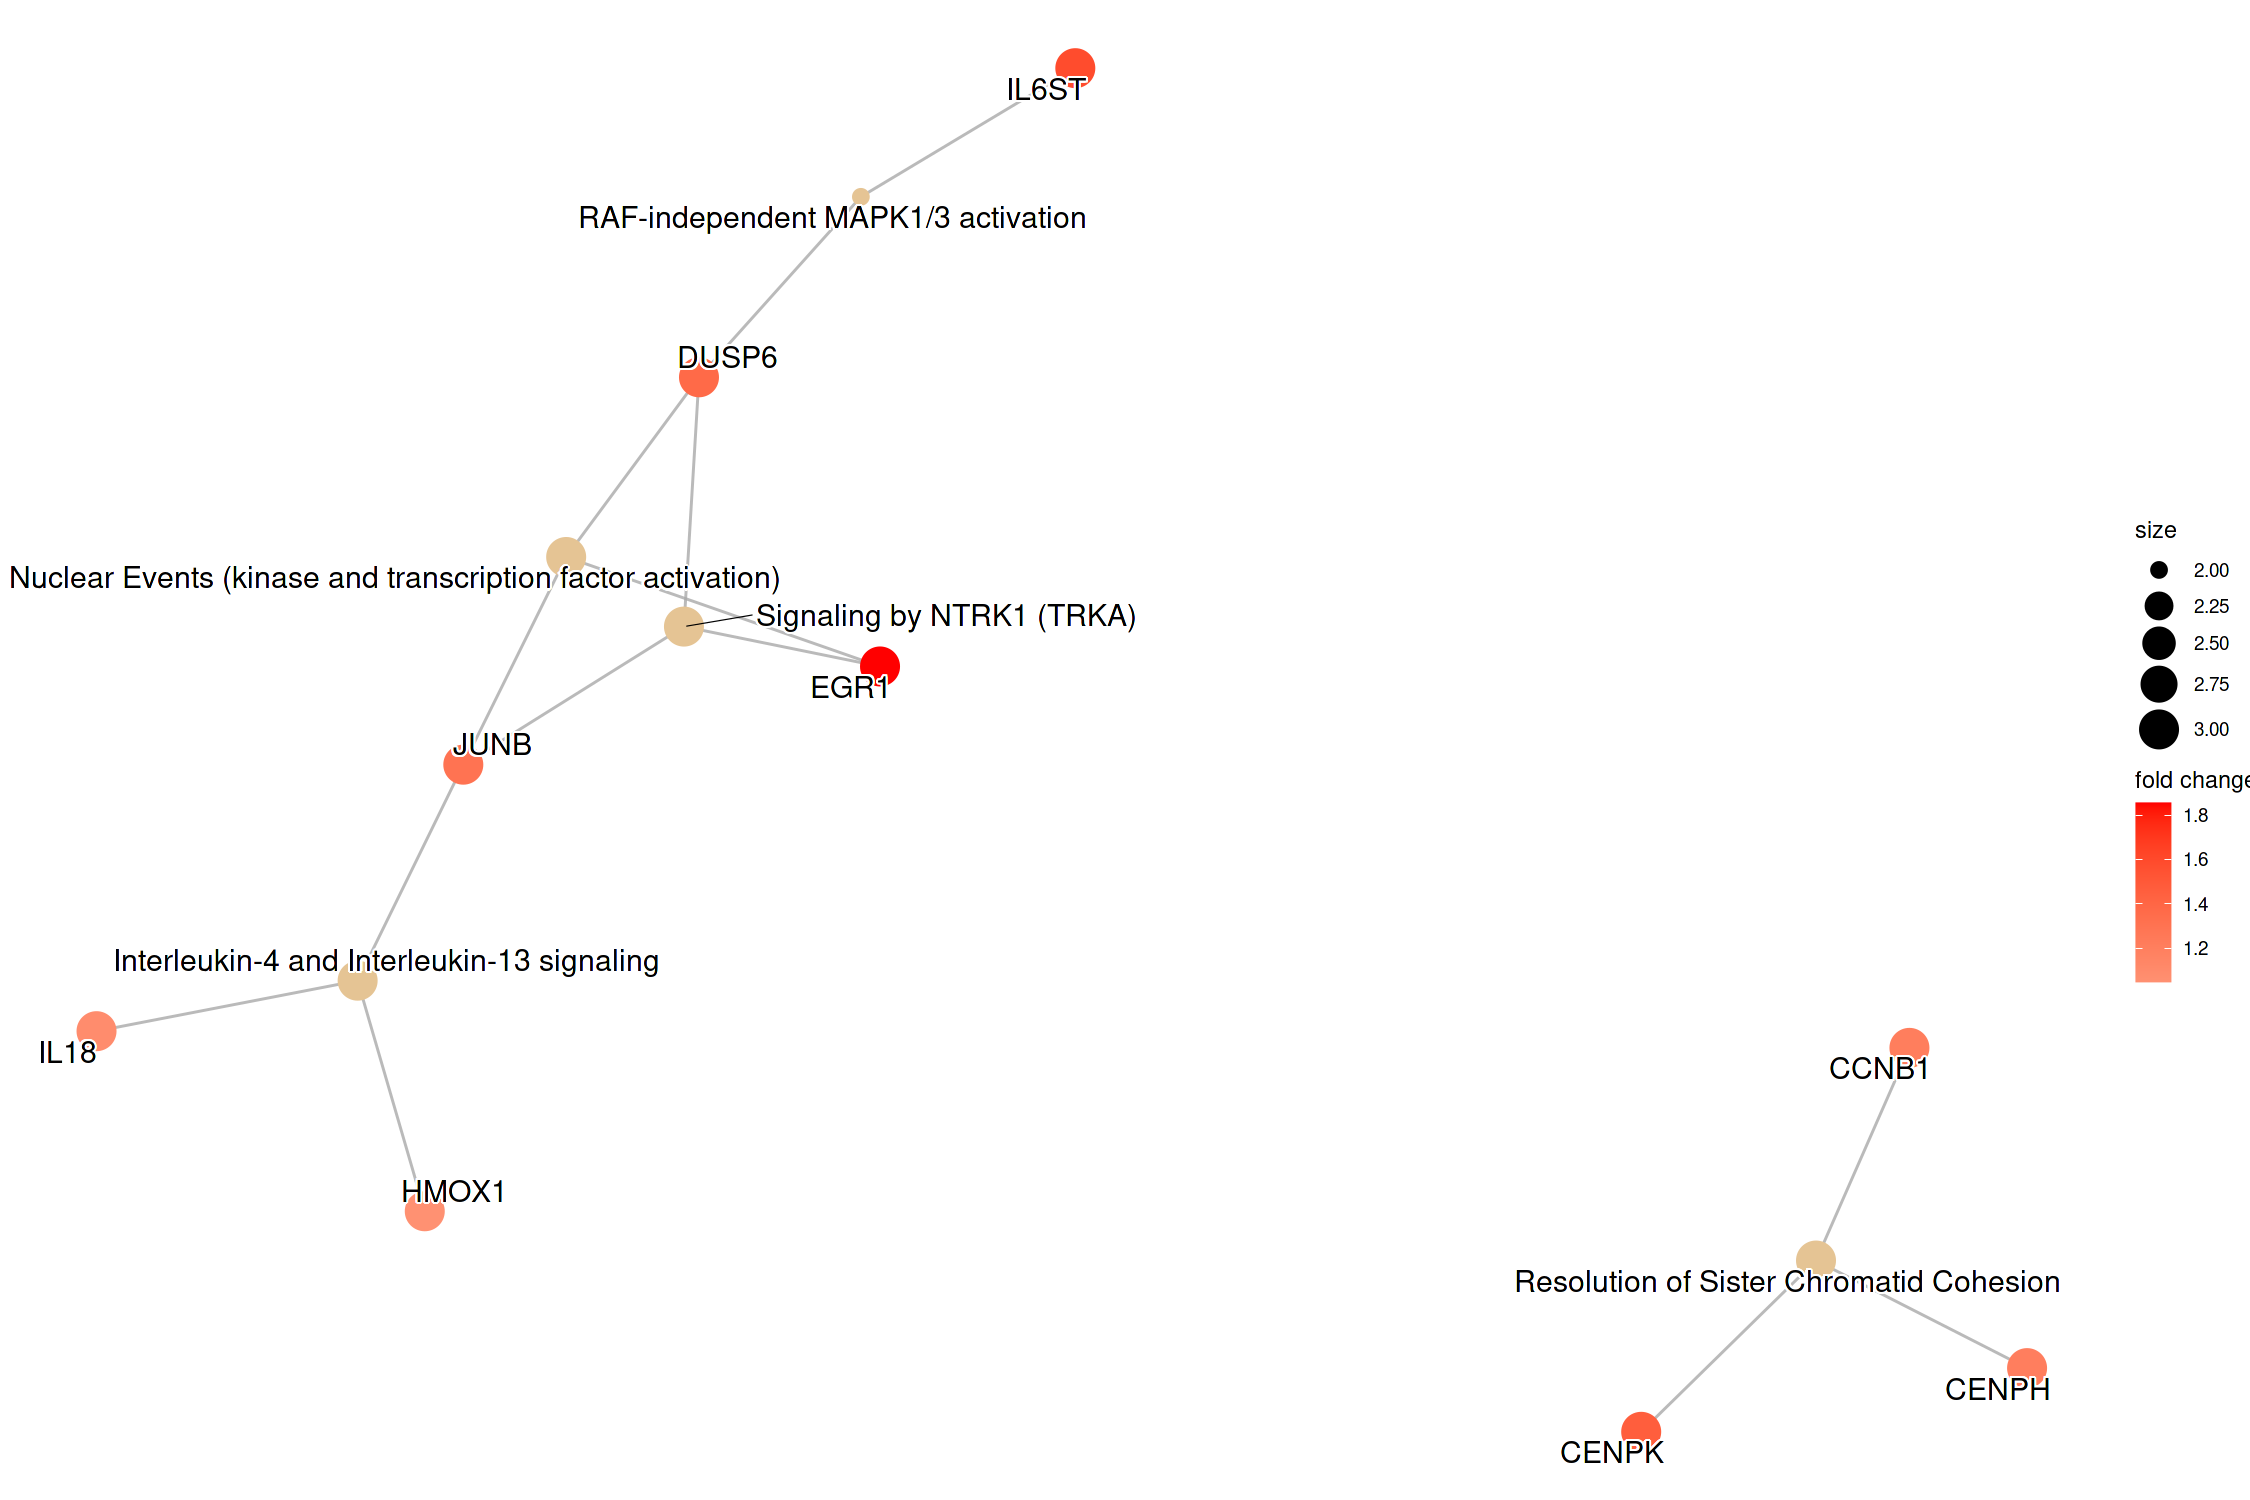

In [68]:
cnetplot(eraC2, foldChange=geneList_C2)

In [60]:
gseC1 <- gseGO(geneList     = geneList_C1,
              OrgDb        = org.Hs.eg.db,
              ont          = "BP",
              minGSSize    = 5,
              maxGSSize    = 150,
              pvalueCutoff = 0.05,
              verbose      = FALSE)

head(gseC1)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
no term enriched under specific pvalueCutoff...



ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


In [61]:
gseC2 <- gseGO(geneList     = geneList_C2,
              OrgDb        = org.Hs.eg.db,
              ont          = "BP",
              minGSSize    = 5,
              maxGSSize    = 150,
              pvalueCutoff = 0.05,
              verbose      = FALSE)

head(gseC2)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“All values in the stats vector are greater than zero and scoreType is "std", maybe you should switch to scoreType = "pos".”
no term enriched under specific pvalueCutoff...



ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
